# **DATASET** 
https://www.kaggle.com/datasets/shantanudhakadd/email-spam-detection-dataset-classification

# **Report**
https://docs.google.com/document/d/1LDhyt0vLWD2esYvI1_KxG4tEYkcsW4xr3yGoSyUUHyY/edit?usp=sharing

# 1. **Read dataset**

In [ ]:
import numpy as np 
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
#mail= pd.read_csv('/content/spam.csv', encoding='latin-1')
mail= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spam2.csv', encoding='latin-1')
mail.head(1600)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
1595,ham,Pls confirm the time to collect the cheque.,NaN,NaN,NaN
1596,spam,As a Registered Subscriber yr draw 4 a å£100 g...,NaN,NaN,NaN
1597,spam,URGENT! Your Mobile number has been awarded wi...,NaN,NaN,NaN
1598,ham,Daddy will take good care of you :),NaN,NaN,NaN


# **2. PRE-PROCESSING**

# i) Handel missing values

In [ ]:
mail.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)
mail.shape

(5572, 2)

In [ ]:
mail.isnull().sum()

v1    0
v2    0
dtype: int64

# ii) Handel  duplicate value

In [ ]:
mail.duplicated().sum()

403

In [ ]:
#drop duplicates if any
mail=mail.drop_duplicates()
mail.shape
mail.duplicated().sum()

0

In [ ]:
mail.shape

(5169, 2)

#  iii) Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
mail['v1'] = enc.fit_transform(mail['v1'])
print(mail[['v1']].head())
print("ham = 0 and spam = 1")

   v1
0   0
1   0
2   1
3   0
4   0
ham = 0 and spam = 1


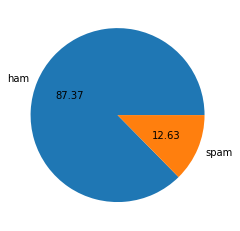

In [ ]:
import matplotlib.pyplot as plt
plt.pie(mail['v1'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
C,D=mail['v1'].value_counts()
#import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#tag=['Ham', 'Spam']
#num=[C,D]
#ax.bar(tag,num)
#plt.show()

In [ ]:
print("Number of Ham",C, "\nNumber of Spam",D)

Number of Ham 4516 
Number of Spam 653


In [ ]:
mail.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# iv) Filtering Text Data

In [ ]:
#import nltk
#nltk.download('punkt')

#string
#mail['v2'].dropna(inplace=True)
mail['v2'] = mail['v2'].astype(str)

#case handel
mail['v2'] = mail['v2'].str.lower()

#stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
mail['v2'] = mail['v2'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# special char
mail = mail.replace(r'[^\w\s]|_', '', regex=True)

mail.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,v1,v2
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah think goes usf lives around though


# v) Feature Extraction

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
count= CountVectorizer()
 
x=count.fit_transform(mail['v2']).toarray()
y=mail['v1']
x.shape

(5169, 9488)

# vi) Split the dataset 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0)

A=x_train.shape[0]
B=x_test.shape[0]

x_train.shape,x_test.shape

((4135, 9488), (1034, 9488))

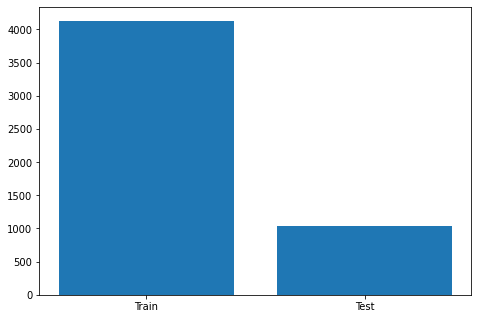

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
tag=['Train', 'Test']
num=[A,B]
ax.bar(tag,num)
plt.show()

In [ ]:
import seaborn as sn #statistical graphics
#sns.displot(mail['v2'])


# **3. MODEL TRAINING (CLASSIFIER)**

**Training Mode---1)  SVC(Support Vector Classifier)**

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)

SVC(kernel='linear')

**SVC ACCURACY**

In [ ]:
a=svc.score(x_train, y_train)*100
b=svc.score(x_test, y_test)*100

In [ ]:
print("Training accuracy of the model: ",a,"%")
print("Testing accuracy of the model: ",b,"%")

Training accuracy of the model:  100.0 %
Testing accuracy of the model:  97.77562862669245 %


[0 0 0 ... 0 0 0]
[[882  20]
 [  3 129]]


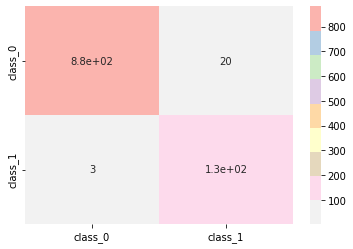

In [ ]:
predictions = svc.predict(x_test)
print(predictions)
from sklearn.metrics import confusion_matrix 
mat=confusion_matrix(predictions, y_test)
print(mat)
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True)

**Training Mode---2) Naive Bayes**

In [ ]:
#some imported libraries

from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.naive_bayes import MultinomialNB #suitable for discrete data
mul = MultinomialNB() #Creating Naive Bayes Classifier
mul.fit(x_train, y_train) # training the Naive Bayes model with the training data

MultinomialNB()

**NAIVE BAYES ACCURACY**

In [ ]:
print("Training accuracy of the model is {:.2f}".format(mul.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(mul.score(x_test, y_test)))

Training accuracy of the model is 0.99
Testing accuracy of the model is 0.97


In [ ]:
predictions = mul.predict(x_test) #predict based on the previous data and fitting to the model
print(predictions)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix #performance of classification algorithm
mat=confusion_matrix(predictions, y_test)
print(mat)

[[862  12]
 [ 23 137]]


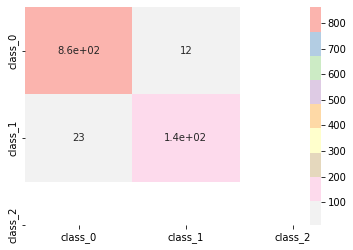

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2'], # transforms the correlation matrix into color coding.
        yticklabels=['class_0' ,'class_1', 'class_2'], annot=True)

**Training Mode---3) Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train, y_train)


LogisticRegression(solver='liblinear')

**LOGISTIC REGRESSION ACCURACY**

In [ ]:
print("Training accuracy of the model is {:.2f}".format(LR.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(LR.score(x_test, y_test)))


Training accuracy of the model is 1.00
Testing accuracy of the model is 0.97


[0 0 0 ... 0 0 0]
[[883  24]
 [  2 125]]


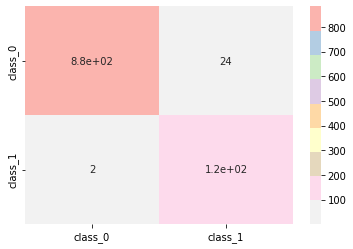

In [ ]:
predictions = LR.predict(x_test)
print(predictions)

from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True)

**VISUALIZATION**

In [ ]:
from sklearn.calibration import CalibrationDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Create classifiers
lr = LogisticRegression()
mul = MultinomialNB()
#svc = svm.SVC(kernel='linear')


clf_list = [
    (lr, "Logistic"),
    (mul, "Naive Bayes")
    #(svc, "SVC")
    
]

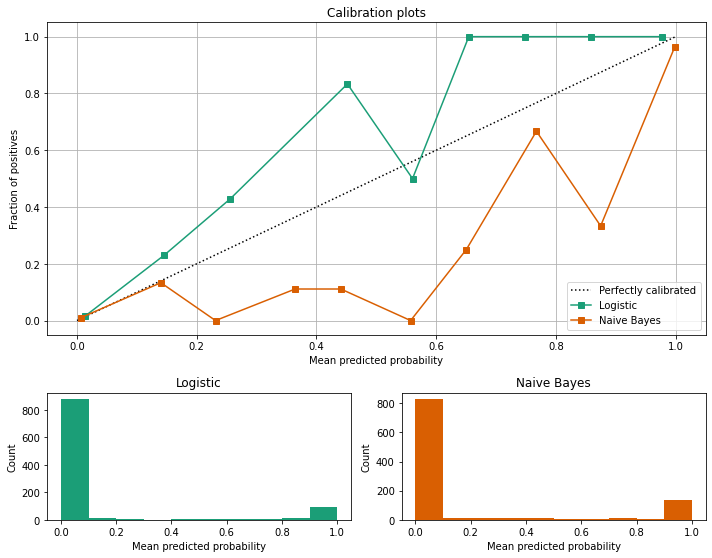

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(x_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        x_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

# **REFERENCES**

1. Hassan, Muhammad Ali & Mtetwa, Nhamoinesu. (2018). Feature Extraction and Classification of Spam Emails. 93-98. 10.1109/ISCMI.2018.8703222. 
https://www.researchgate.net/publication/332823881_Feature_Extraction_and_Classification_of_Spam_Emails
2. S. (2021, December 15). Spam Mail Detection Using Support Vector Machine. - Becoming Human: Artificial Intelligence Magazine. Medium. https://becominghuman.ai/spam-mail-detection-using-support-vector-machine-cdb57b0d62a8 
3. McGregor, M. (2020, July 2). SVM Machine Learning Tutorial – What is the Support Vector Machine Algorithm, Explained with Code Examples. freeCodeCamp.Org. https://www.freecodecamp.org/news/svm-machine-learning-tutorial-what-is-the-support-vector-machine-algorithm-explained-with-code-examples/ 






